In [78]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [100]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("MongoDBCompass") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/big") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/big") \
    .getOrCreate()



In [101]:
# Read data from MongoDB
df = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

# Show the data
df.show()



Py4JJavaError: An error occurred while calling o1644.load.
: org.apache.spark.SparkClassNotFoundException: [DATA_SOURCE_NOT_FOUND] Failed to find the data source: com.mongodb.spark.sql.DefaultSource. Please find packages at `https://spark.apache.org/third-party-projects.html`.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.dataSourceNotFoundError(QueryExecutionErrors.scala:724)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:647)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:697)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:208)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:172)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: java.lang.ClassNotFoundException: com.mongodb.spark.sql.DefaultSource.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:588)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:521)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:633)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:633)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:633)
	... 15 more


In [79]:
from pyspark.sql import SparkSession



In [80]:
# Create a SparkSession
spark = SparkSession.builder.getOrCreate()



In [81]:
# Load the dataset into a DataFrame
dataset_path = "C:/Users/AlDawlia/Desktop/fueltype.csv"
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

In [82]:
df

DataFrame[_c0: int, brand: string, name: string, bodyType: string, year: int, transmission: string, power: int, fuelType: string]

In [83]:
# Select columns brand, bodyType, year, transmission, power, fuelType
df = df.select("brand", "bodyType", "year", "transmission", "power", "fuelType")

In [84]:
df

DataFrame[brand: string, bodyType: string, year: int, transmission: string, power: int, fuelType: string]

In [85]:
#preprocessing
print("Data Types:")
df.printSchema()

Data Types:
root
 |-- brand: string (nullable = true)
 |-- bodyType: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- power: integer (nullable = true)
 |-- fuelType: string (nullable = true)



In [87]:
# Descriptive statistics
print("Descriptive Statistics:")
df.describe().show()

Descriptive Statistics:
+-------+-------+-------------+------------------+------------+------------------+--------+
|summary|  brand|     bodyType|              year|transmission|             power|fuelType|
+-------+-------+-------------+------------------+------------+------------------+--------+
|  count|1048034|      1048034|            639362|     1042602|           1037869| 1043615|
|   mean|   NULL|         NULL|2005.2700676611998|        NULL|158.68152242720421|    NULL|
| stddev|   NULL|         NULL| 8.219179906978063|        NULL| 71.50729764432751|    NULL|
|    min|  Acura|        coupe|              1953|          AT|                45|  Diesel|
|    max|  Volvo|station wagon|              2021|       Robot|               650|Gasoline|
+-------+-------+-------------+------------------+------------+------------------+--------+



In [88]:
# Sum of NaN values
from pyspark.sql.functions import isnan, count, when

print("Sum of NaN Values:")
df.select([count(when(isnan(c) | df[c].isNull(), c)).alias(c) for c in df.columns]).show()

Sum of NaN Values:
+-----+--------+------+------------+-----+--------+
|brand|bodyType|  year|transmission|power|fuelType|
+-----+--------+------+------------+-----+--------+
|    0|       0|408672|        5432|10165|    4419|
+-----+--------+------+------------+-----+--------+



In [89]:
# Count null values for each column
null_counts = df.select([count(when(isnan(c) | df[c].isNull(), c)).alias(c) for c in df.columns])

# Show the counts of null values
null_counts.show()

+-----+--------+------+------------+-----+--------+
|brand|bodyType|  year|transmission|power|fuelType|
+-----+--------+------+------------+-----+--------+
|    0|       0|408672|        5432|10165|    4419|
+-----+--------+------+------------+-----+--------+



In [90]:
# Drop rows containing null or NaN values
df = df.na.drop()

# Show the DataFrame after dropping rows with null values
df.show()

+----------+-----------------+----+------------+-----+--------+
|     brand|         bodyType|year|transmission|power|fuelType|
+----------+-----------------+----+------------+-----+--------+
|    Toyota|     jeep 5 doors|1995|          AT|  130|  Diesel|
|    Toyota|hatchback 5 doors|2019|         CVT|   95|Gasoline|
|    Toyota|            sedan|2002|          AT|  160|Gasoline|
|    Toyota|     jeep 5 doors|2010|          AT|  170|Gasoline|
|    Hummer|     jeep 5 doors|2002|          AT|  315|Gasoline|
|Mitsubishi|     jeep 5 doors|2005|         CVT|  170|Gasoline|
|    Subaru|     jeep 5 doors|2015|         CVT|  150|Gasoline|
|    Toyota|     jeep 5 doors|2000|          AT|  185|Gasoline|
|    Subaru|hatchback 5 doors|2011|         CVT|  103|Gasoline|
|    Toyota|     jeep 5 doors|2012|      Manual|  146|Gasoline|
|Mitsubishi|     jeep 5 doors|2010|      Manual|  178|Gasoline|
|     Lexus|     jeep 5 doors|2007|          AT|  383|Gasoline|
|    Toyota|     jeep 3 doors|2005|     

In [91]:
# Test NaN (optional)
print("Test NaN:")
df.select([count(when(isnan(c) | df[c].isNull(), c)).alias(c) for c in df.columns]).show()

Test NaN:
+-----+--------+----+------------+-----+--------+
|brand|bodyType|year|transmission|power|fuelType|
+-----+--------+----+------------+-----+--------+
|    0|       0|   0|           0|    0|       0|
+-----+--------+----+------------+-----+--------+



In [92]:
# Drop duplicates
df = df.dropDuplicates()

In [93]:
# Check for duplicates after dropping
print("Duplicates after dropping:")
df.select(df.columns).groupBy(df.columns).count().where("count > 1").show()

Duplicates after dropping:
+-----+--------+----+------------+-----+--------+-----+
|brand|bodyType|year|transmission|power|fuelType|count|
+-----+--------+----+------------+-----+--------+-----+
+-----+--------+----+------------+-----+--------+-----+



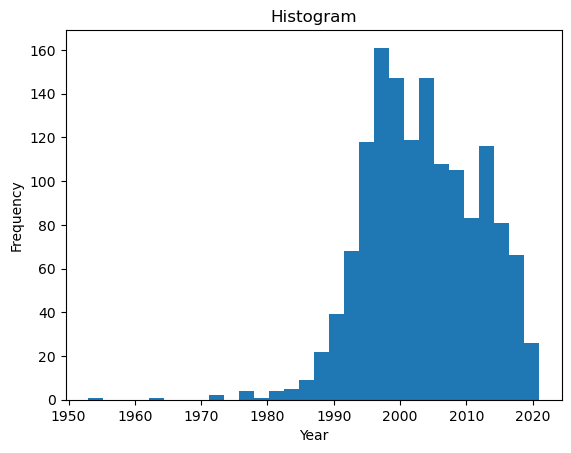

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.select('year').toPandas()

# Plot histogram using matplotlib
plt.hist(df_pandas['year'], bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

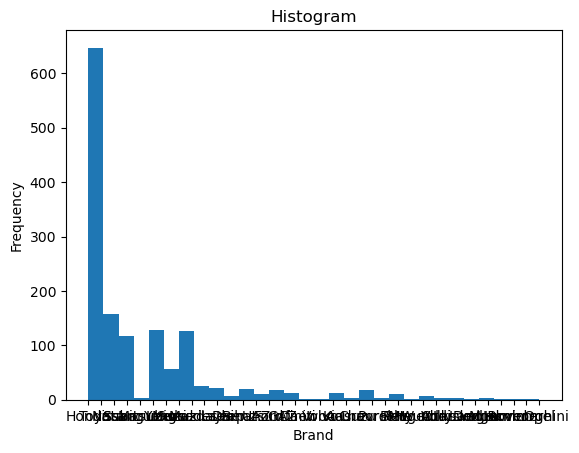

In [95]:
df_pandas = df.select('brand').toPandas()

# Plot histogram using matplotlib
plt.hist(df_pandas['brand'], bins=30)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


C:\Users\AlDawlia\anaconda3\envs\envname\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AlDawlia\anaconda3\envs\envname\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='brand', ylabel='year'>

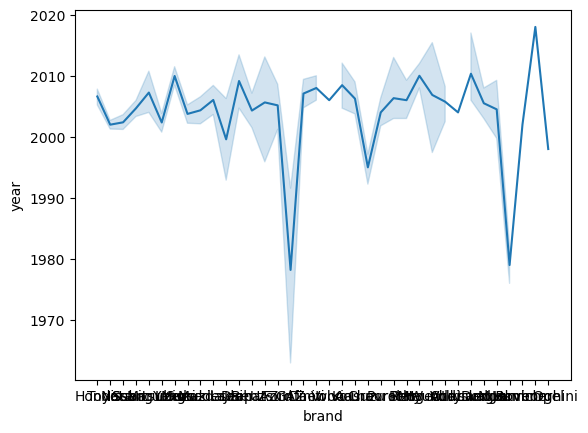

In [96]:
df_pandas = df.select('brand', 'year').toPandas()

# Plot line plot using seaborn
sns.lineplot(x='brand', y='year', data=df_pandas)

